<font color="Yellow" size="6">Neural Networks</font>

<font color="yellow" size="6">3_RBM_EXAMPLE_3(RBM + SVM)+PCA </font>

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target variable (Wine classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Define the RBM model
rbm = BernoulliRBM(n_components=50, random_state=42)

In [4]:
# Define the SVM model
svm = SVC(kernel='linear', random_state=42)

In [7]:
# Create a pipeline with scaling, RBM, and SVM
pipeline_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the data
    ('rbm', rbm),                 # Feature extraction using RBM
    ('svm', svm)                  # Classification using SVM
])

# Train the pipeline
pipeline_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = pipeline_svm.predict(X_test)

# Evaluate the model
print("Accuracy with SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm,zero_division=1))

Accuracy with SVM: 0.6111111111111112

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.00      0.00        14
           2       0.42      1.00      0.59         8

    accuracy                           0.61        36
   macro avg       0.75      0.67      0.50        36
weighted avg       0.80      0.61      0.48        36



Visualization of Feature Extraction

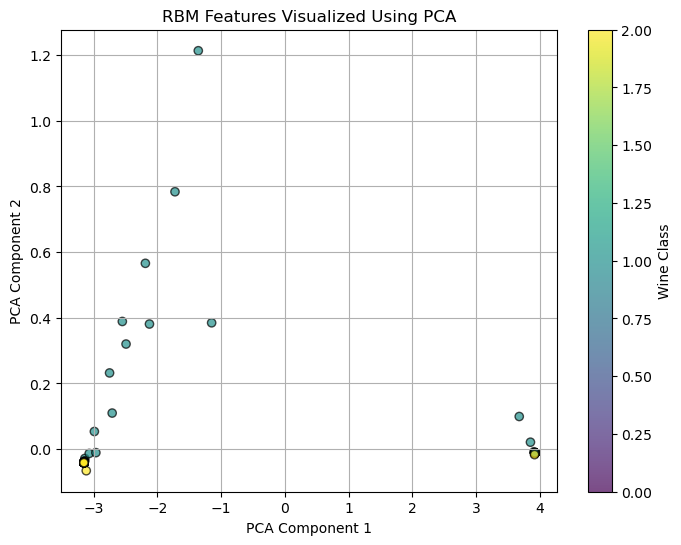

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract features using RBM
rbm_features = rbm.transform(StandardScaler().fit_transform(X))

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
rbm_features_pca = pca.fit_transform(rbm_features)

# Plot the RBM features
plt.figure(figsize=(8, 6))
plt.scatter(rbm_features_pca[:, 0], rbm_features_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label='Wine Class')
plt.title('RBM Features Visualized Using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


Customizing the RBM Parameters

RBM parameters like n_components, learning_rate, and n_iter can significantly affect performance. Example:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, random_state=42)
